<a href="https://colab.research.google.com/github/prasadwagh2503/Netflix_Movies_and_TV_Shows_Clustering/blob/main/Prasad_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 - Prasad Wagh**
##### **Team Member 2 -Manjiri Kulkarni**


# **Project Summary -**

Netflix, Inc. is an American media company based in Los Gatos, California. Founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California, it operates the over-the-top subscription video on-demand service Netflix brand, which includes original films and television series commissioned or acquired by the company, and third-party content licensed from other distributors. As of January 2023, Netflix had over 230 million subscribers worldwide.


In this  project, we were required to do:
- Exploratory Data Analysis.
- Understanding what type content is available in different countries.
- Is Netflix has increasingly focusing on TV rather than movies in recent years?
- Clustering similar content by matching text-based features.

**Approach:**

1. The dataset contained about 7787 records, and 12 attributes. We started with ***importing necessary libraries***, mounting drive and storing data in variables for deriving meaningful insights. Next step being data wrangling, we extracted the date_added column into day, month and year. 

2. Next step being ***data analysis and visualization***, where we analyzed our ***data distribution*** with the help of different plots, we tried to exploit ***meaningful insights*** from the dataset.

3. In order to make data ready for the model training, we did ***feature engineering and data pre-processing***. We ***handled the null values*** by replacing them by appropriate ways (***empty string***).

4. In the textual data preprocessing, we decided to **cluster the data based on the attributes = director, cast, country, genre, rating and description**. After selecting attributes for clustering, we removed all the stopwords and punctuations. We converted these attributes into lower cases and performed stemming using SnowballStemmer.


5. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer. Through **TFIDF Vectorization, we created a total of 10000 attributes**.

5. We used **Principal Component Analysis (PCA) to reduce the dimensionality**. Using the scree plot, we observed around **5000 components were able to capture more than 90% of variance**, and hence, the number of components were restricted to 5000.

6. We first built clusters using the **K-Means Clustering** algorithm, and the **optimal number of clusters came out to be 10**. This was obtained using **Elbow method and Silhouette score** analysis.

7. Then clusters were built using the **Agglomerative clustering** algorithm, and the **optimal number of clusters came out to be 14**. This was obtained after visualizing the **dendrogram**.

8. A **content based recommender system** was built using the similarity matrix obtained after using **cosine similarity**. This recommender system will make 10 recommendations to the user based on the type of show they watched.


Overall, while working on this particular dataset, we applied combination of ***Data Processing, Visualisation and Machine Learning Techniques***. It was a challenging task but with the right approach, we were able to ***successfully build clusters and a content based recommender system.***

# **GitHub Link -**

https://github.com/prasadwagh2503/Netflix_Movies_and_TV_Shows_Clustering

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.


In this  project, we are required to do:
1. Exploratory Data Analysis.

2. Understanding what type content is available in different countries.

3. Is Netflix has increasingly focusing on TV rather than movies in recent years?
4. Clustering similar content by matching text-based features.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

*In order to design any model, one of the most important thing is to know your data. Here, we will load our data and take a first view of it.*

### Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data pre-processing
import string,unicodedata
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# library used for building recommandation system
from sklearn.metrics.pairwise import cosine_similarity

# library used for Clusters implementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

#Plotly visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
sns.set()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [2]:
# Load Dataset
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone 4 : Unsupervised/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [5]:
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

In [6]:
df.shape

(7787, 12)

### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count

print(f"No of Rows = {df.shape[0]} \nNo of Columns = {df.shape[1]}") 

No of Rows = 7787 
No of Columns = 12


### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count

print(f"Number of duplicated rows in the dataset: {df.duplicated().sum()}")

Number of duplicated rows in the dataset: 0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count

# function for determination of null values, uniques values in columns and there features.
def Complete_columns_info(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        unique_val= df.nunique()
        cci_table = pd.concat([mis_val, mis_val_percent, unique_val], axis=1)
        cci_table = cci_table.rename(columns = {0 : 'No of Null Values', 1 : '% of null values', 2 : 'No of unique values' })
        cci_table['Data Type'] = df.dtypes
        cci_table = cci_table.sort_values('% of null values', ascending=False).round(1)
        print (" selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]),"rows")
        return cci_table

In [11]:
Complete_columns_info(df)

 selected dataframe has 12 columns and 7787 rows


No of Null Values  % of null values  No of unique values  \
director                   2389              30.7                 4049   
cast                        718               9.2                 6831   
country                     507               6.5                  681   
date_added                   10               0.1                 1565   
rating                        7               0.1                   14   
show_id                       0               0.0                 7787   
type                          0               0.0                    2   
title                         0               0.0                 7787   
release_year                  0               0.0                   73   
duration                      0               0.0                  216   
listed_in                     0               0.0                  492   
description                   0               0.0                 7769   

             Data Type  
director        object  
cast            object  
country         object  
date_added      object  
rating          object  
show_id         object  
type            object  
title           object  
release_year     int64  
duration        object  
listed_in       object  
description     object

<Axes: >

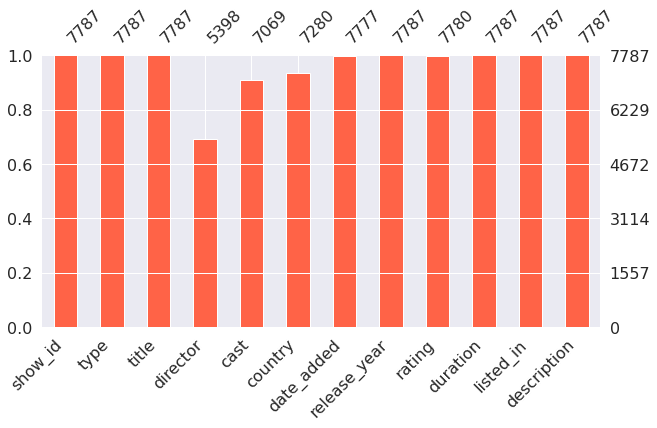

In [12]:
# Visualizing the missing values

msno.bar(df,figsize=(10,5),color="tomato")

### What did you know about your dataset?

- The dataset has **7787 rows** and **12 columns**.
- **'director'** has the highest no of null values followed by **'cast'** and **'country'**.
- Only **'release_year'** is in integer dtype.

## ***2. Understanding Your Variables***

*For any Machine Learning model, variables and their importance plays a vital role. Hence, 'Understanding Your Variables' is one of the most important step. This is another way of data exploration where we check the numerical columns, variable description and try to know a bit about our variables/data etc.*


In [13]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
# Dataset Describe
df.describe(include='all').transpose()

count unique  \
show_id         7787   7787   
type            7787      2   
title           7787   7787   
director        5398   4049   
cast            7069   6831   
country         7280    681   
date_added      7777   1565   
release_year  7787.0    NaN   
rating          7780     14   
duration        7787    216   
listed_in       7787    492   
description     7787   7769   

                                                            top  freq  \
show_id                                                      s1     1   
type                                                      Movie  5377   
title                                                        3%     1   
director                                 Raúl Campos, Jan Suter    18   
cast                                         David Attenborough    18   
country                                           United States  2555   
date_added                                      January 1, 2020   118   
release_year                                                NaN   NaN   
rating                                                    TV-MA  2863   
duration                                               1 Season  1608   
listed_in                                         Documentaries   334   
description   Multiple women report their husbands as missin...     3   

                    mean       std     min     25%     50%     75%     max  
show_id              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
type                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
title                NaN       NaN     NaN     NaN     NaN     NaN     NaN  
director             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
cast                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
country              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
date_added           NaN       NaN     NaN     NaN     NaN     NaN     NaN  
release_year  2013.93258  8.757395  1925.0  2013.0  2017.0  2018.0  2021.0  
rating               NaN       NaN     NaN     NaN     NaN     NaN     NaN  
duration             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
listed_in            NaN       NaN     NaN     NaN     NaN     NaN     NaN  
description          NaN       NaN     NaN     NaN     NaN     NaN     NaN

### Variables Description 

- **show_id** : Unique ID for every Movie/Show
- **type** : Identifier - Movie/Show
- **title** : Title of the Movie/Show
- **director** : Director of the Movie/Show
- **cast** : Actors involved in the Movie/Show
- **country** : Country where the Movie/Show was produced
- **date_added** : Date it was added on Netflix
- **release_year** : Actual Release year of the Movie/Show
- **rating** : TV Rating of the Movie/Show
- **duration** : Total Duration - in minutes or number of seasons
- **listed_in** : Genre
- **description**: The Summary description

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.

for i in df.columns.tolist():
  print("Unique values in",i,":",df[i].nunique())

Unique values in show_id : 7787
Unique values in type : 2
Unique values in title : 7787
Unique values in director : 4049
Unique values in cast : 6831
Unique values in country : 681
Unique values in date_added : 1565
Unique values in release_year : 73
Unique values in rating : 14
Unique values in duration : 216
Unique values in listed_in : 492
Unique values in description : 7769


## 3. ***Data Wrangling***

*It involves reorganizing, mapping, and transforming data from its raw, unstructured form into a more usable format. Here we have just extracted the date_added column into day, month and year.*

### Data Wrangling Code

In [16]:
# Typecasting string object to datetime object of date_added column
df['date_added']= pd.to_datetime(df['date_added'])

# Extracting date, day, month and year from date_added column
df["day_added"]= df["date_added"].dt.day
df["month_added"]= df["date_added"].dt.month
df["year_added"]= df["date_added"].dt.year

# Dropping date_added
df.drop('date_added', axis=1, inplace=True)

In [17]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  month_added  \
0  In a future where the elite inhabit an island ...       14.0          8.0   
1  After a devastating earthquake hits Mexico Cit...       23.0         12.0   
2  When an army recruit is found dead, his fellow...       20.0         12.0   
3  In a postapocalyptic world, rag-doll robots hi...       16.0         11.0   
4  A brilliant group of students become card-coun...        1.0          1.0   

   year_added  
0      2020.0  
1      2016.0  
2      2018.0  
3      2017.0  
4      2020.0

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

*Exploratory Data Analysis refers to the process of performing initial investigations on the data so as to read various patterns. It also helps to spot anomalies that are present in the data. It is a well defined approach to get the story of the data as it helps in understanding the relationships between different variables. By observing visualisations, we can also infer how to handle missing values and make transformations of variables as needed.*

#### **Content Type :**



#####**Chart 1 : Yearly Production of Different Content Categories :**

Our problem statement mentions a report (published in 2018) which states that the no of TV shows on Netflix has nearly trippled since 2010. Let's confirm the same.

In [18]:
# let's create a few new columns for our understanding
yearly_movies=df[df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearly_shows=df[df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=df['release_year'].value_counts().sort_index(ascending=False).head(15)

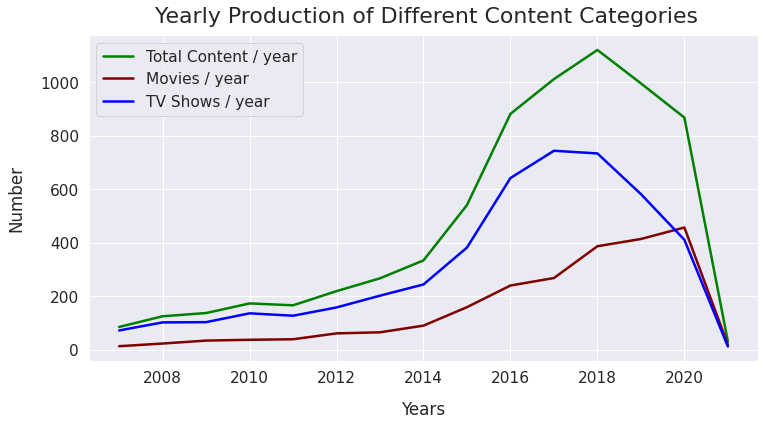

In [19]:
# Chart - 1 visualization code

sns.set(font_scale=1.4)
total_content.plot(figsize=(12, 6), linewidth=2.5, color='green',label="Total Content / year")
yearly_movies.plot(figsize=(12, 6), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
yearly_shows.plot(figsize=(12, 6), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title(" Yearly Production of Different Content Categories", y=1.02, fontsize=22);

**Inferences :**
- Production of both the categories has been on a increasing side year-on-year until 2018 for TV Shows and 2020 for movies.
- By 2018, no of TV shows has nearly trippled since 2010.
- Post 2018, production of movies are on a sharp decline. One of the plausible reason could be increase in watching of TV shows.
- Post 2020, production of TV Shows are on a sharp decline. One of the prominent reason could be outbreak of COVID-19.

In [20]:
# content release over the year by content type

df1 = df[df["type"] == "TV Show"]
df2 = df[df["type"] == "Movie"]

temp_df1 = df1['release_year'].value_counts().reset_index()
temp_df2 = df2['release_year'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['release_year'],
                name="TV Shows",
                marker = dict(color = 'rgb(249, 6, 6)'))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['release_year'],
                name = "Movies",
                marker = dict(color = 'rgb(26, 118, 255)'))


layout = go.Layout(template= "ggplot2",title = 'CONTENT RELEASED OVER THE YEAR BY CONTENT TYPE' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show(renderer='colab')

**Inferences :**
- Surprisingly, Netflix has released more movies than the shows and this trend is continued.
- In 2018, Netflix released almost double no of movies(734) than the TV Shows(387).
- 2020 was the only one year in which more TV Shows(457) were released than the movies(411).

##### **Chart - 2 : Most watched content on the Netflix :**

Let's visualise the most watched content using plotly visualisation.

In [21]:
#code for plotly visualisation

fig_donut = px.pie(df, names='type', height=300, width=600, hole=0.7,
title='Most watched content on the Netflix',
color_discrete_sequence=['#b20710', '#221f1f'])
fig_donut.update_traces(hovertemplate=None, textposition='outside',
textinfo='percent+label', rotation=90)
fig_donut.update_layout(margin=dict(t=60, b=30, l=0, r=0), showlegend=False,
plot_bgcolor='#333', paper_bgcolor='#333',
title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
font=dict(size=17, color='#8a8d93'),
hoverlabel=dict(bgcolor="#444", font_size=13,
font_family="Lato, sans-serif"))
fig_donut.show(renderer='colab')

**Inferences :**
- Since the no of movies(released/produced) are more on the Netflix, clearly, Movies(69%) are the most watched over TV Shows(31%). 

### **Director :**

##### **Chart - 1 : Top directors :**


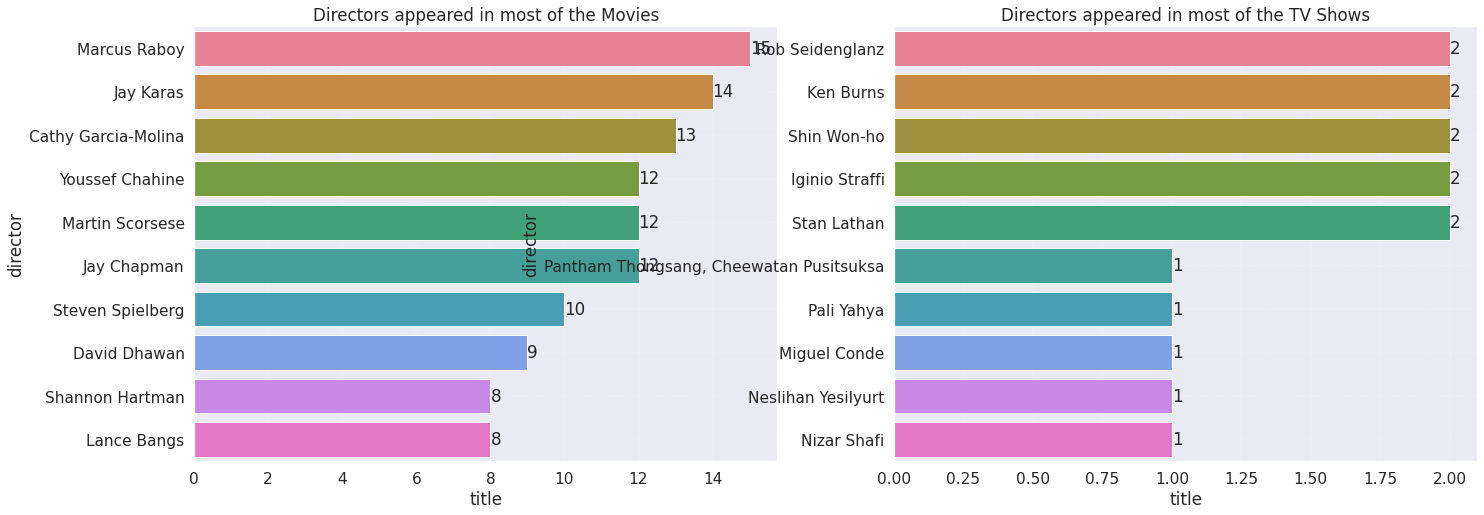

In [22]:
plt.figure(figsize=(23,8))
for i,j,k in ((df[df['type']== 'Movie'], 'Movies',0),(df[df['type']== 'TV Show'], 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_director = i.groupby(['director']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:11]
  plots= sns.barplot(y = "director",x = 'title', data = df_director, palette='husl')
  plt.title(f'Directors appeared in most of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

**Inferences :**
- Marcus Raboy has directed the most number of movies(15) available on Netflix. He is followed by Jay Karas(14) and Cathy Garcia-Molina(13).
- In the TV shows category, Rob Seidenglanz, Ken Burns and a few others has directed most no of shows(2). They are followed by Pantham Thongsang, Cheewatan Pusitsuksa and others with one show each.


### **Cast :**

##### **Chart - 1 : Top Actors:**


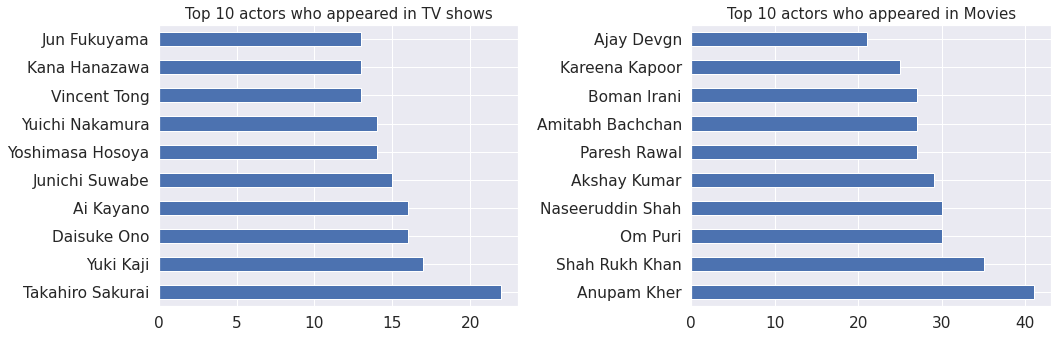

In [23]:
#defining fig size and axis
fig,ax = plt.subplots(1,2, figsize=(15,5))

# top 10 TV shows actors 
TV_shows = df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='barh', ax=ax[0])
TV_shows.set_title('Top 10 actors who appeared in TV shows', size=15)

# top 10 Movie actors
movies = df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('Top 10 actors who appeared in Movies', size=15)

plt.tight_layout()
plt.show()

**Inferences :**
- In the movies category, Anupam Kher has appeared in over 40 movies. He is followed by Shah Rukh Khan(35), Om Puri(30) and others.
- In the TV shows category, Takahiro Sakurai has appeared in over 20 TV shows. He is followed by Yuki Kaji(17), Daisuke Ono(16) and others. 


### **Country :** 

##### **Chart - 1 : Countries Involved in Content Production :** 

In [24]:
# all countries df
all_countries = df.groupby(['country','type']).count()['show_id'].reset_index()

In [25]:
import re
country_count = {}
for i in range(len(all_countries)):
    l = all_countries['country'][i].split(', ')
    for x in l:
        x = re.sub('[^A-Za-z0-9 ]+', '', x)
        if x not in country_count.keys():
            country_count[x] = all_countries['show_id'][i]
        else:
            country_count[x] += all_countries['show_id'][i]
country_df = pd.DataFrame(list(zip(country_count.keys(), country_count.values())), columns =['country', 'count'])

In [26]:
#total content per country
sns.set_theme()
trace = go.Choropleth(
            locations = list(country_count.keys()),
            locationmode='country names',
            z = list(country_count.values()),
            text = country_df['country'],
#             autocolorscale =True,
            reversescale = False,
            zauto = True,
            colorscale = 'RdBu',
            marker = dict(
                line = dict(
                    color = 'firebrick',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Total Content',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Total content produced/released per country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
#         projection = dict(
#             type = 'natural earth'
#         )
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

**Inferences :**
- If we compare the content production across different countries, The United State of America tops the chart with 3200 projects. It is followed by India(990) and United Kingdom(723).
- Most parts of Asia, West Asia and Europe are producing content in the range of 0-500 projects.
- Although North American countries are seen to have a good hold on the content production, the South American countries are still lagging behind. 


### **Date Added :** 

##### **Chart - 1 : Content released and added per Year:** 

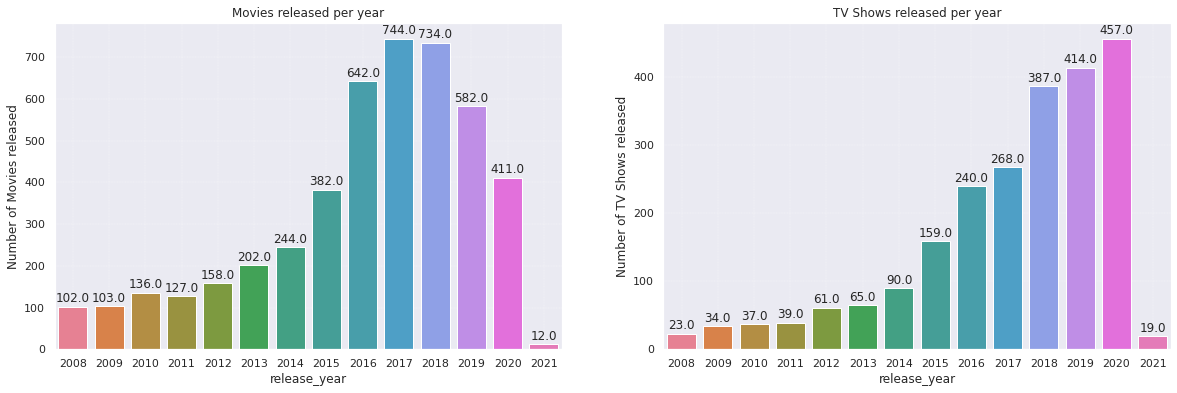

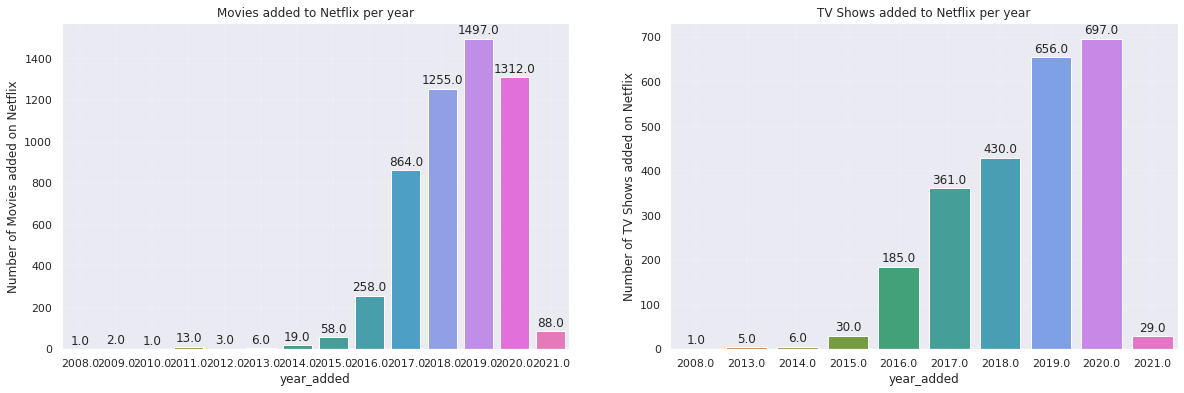

In [27]:
plt.figure(figsize=(20,6))
for i,j,k in ((df[df['type']== 'Movie'], 'Movies',0),(df[df['type']== 'TV Show'], 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_release_year = i.groupby(['release_year']).agg({'title':'nunique'}).reset_index().sort_values(by=['release_year'],ascending=False)[:14]
  plots= sns.barplot(x = 'release_year',y= 'title', data = df_release_year, palette='husl')
  plt.title(f'{j} released per year')
  plt.ylabel(f"Number of {j} released")
  plt.grid(linestyle='--', linewidth=0.3)

  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

plt.figure(figsize=(20,6))
for i,j,k in ((df[df['type']== 'Movie'], 'Movies',0),(df[df['type']== 'TV Show'], 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_country = i.groupby(['year_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
  plots= sns.barplot(x = 'year_added',y= 'title', data = df_country, palette='husl')
  plt.title(f'{j} added to Netflix per year')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)

  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

**Inferences :**
- 2017 has seen the highest no of movies(744) released on the Netflix. 2018 closely followed the trend and has seen the second highest no of movies(734) released.
- During 2019, Netflix added the highest no of movies(1497) on their platform. In 2020, the pattern remained almost the same and Netflix added close to 1300 movies. The year 2017 has seen almost 3 times more no of movies added than the previous year!
- In the year 2020, Netflix released(457) as well as added(697) the highest no of TV shows on their platform. One of the prime reason could be outbreak of COVID-19 and subsequent lockdown by different governments.


##### **Chart - 2 : Content added per Month :** 

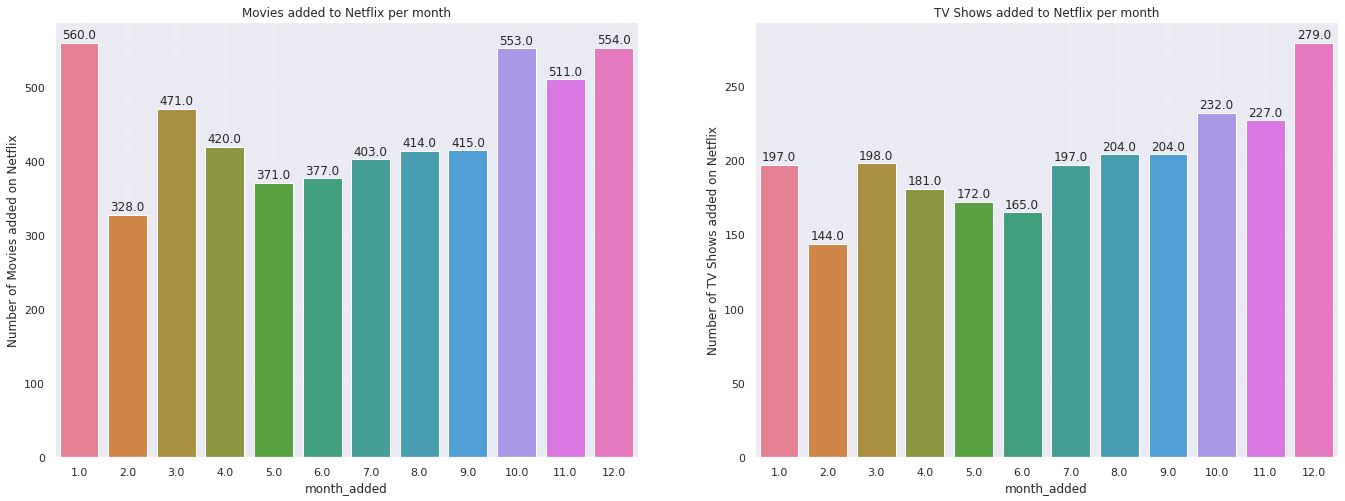

In [28]:
plt.figure(figsize=(23,8))
for i,j,k in ((df[df['type']== 'Movie'], 'Movies',0),(df[df['type']== 'TV Show'], 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_month = i.groupby(['month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['month_added'],ascending=False)
  plots= sns.barplot(x = 'month_added',y='title', data = df_month, palette='husl')
  plt.title(f'{j} added to Netflix per month')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)
  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

**Inferences :**
- In the January month, Netflix adds most no of movies on their platform i.e 560. It is followed by December(554), October(553) and November(511). February sees the lowest no of movie addition i.e 328.
- Addition of TV Shows is gradually on a increasing trend from July and it is at peak in December(279). Similar to the movies, February sees the lowest no of TV Shows addition to the platform.

##### **Chart - 3 : Content added per Day :** 

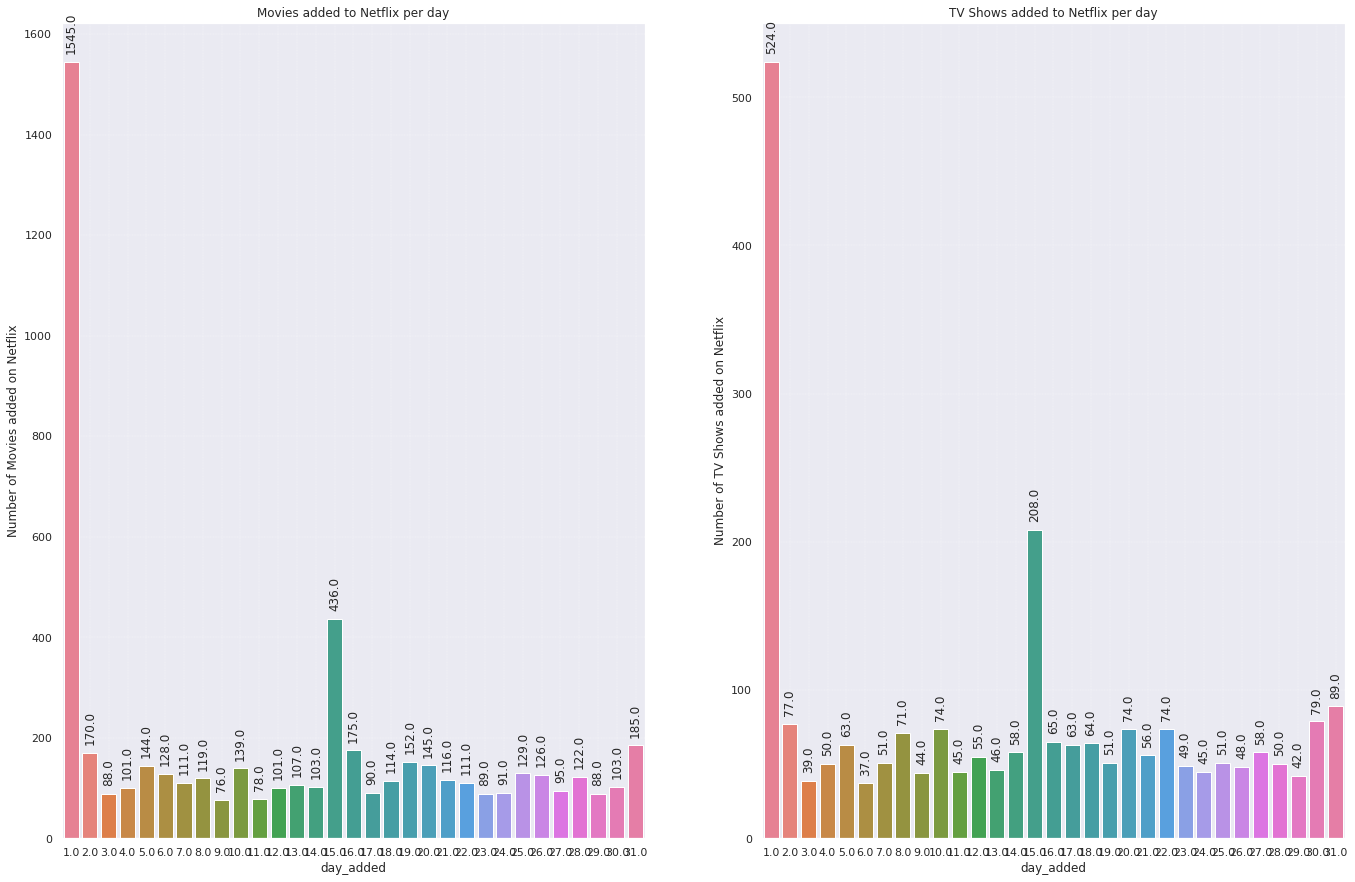

In [29]:
plt.figure(figsize=(23,15))
for i,j,k in ((df[df['type']== 'Movie'], 'Movies',0),(df[df['type']== 'TV Show'], 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_day = i.groupby(['day_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['day_added'],ascending=False)
  plots= sns.barplot(x = 'day_added',y='title', data = df_day, palette='husl')
  plt.title(f'{j} added to Netflix per day')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)
  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='bottom',
                    size=12, xytext=(0, 8),
                    textcoords='offset points', rotation=90)
plt.show()

**Inferences :**
- Highest no of Movies and TV Shows are added on the 1st of any month. 15th day of any month sees the second highest no of additions. 
- One of the main reasons to choose 1 and 15 as the addition days could be easier analysis of the project streaming as it becomes easier to track how a particular movie/show is performing in that particular month. 


### **Release Year :**

##### **Chart - 1 : Content Released over the Years :** 

In [30]:
temp_df1 = df['release_year'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['release_year'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly" , title={'text': "CONTENT RELEASED OVER THE YEARS",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'} , 
                   xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show(renderer='colab')

**Inferences :**
- The content production is gradually on a increasing trend from 2000 to 2018. After 2018, it gradually went down in 2019 and 2020.
- The 2010 to 2020 decade has seen almost 5 times growth in the production and no of projects. 


### **Rating :**

##### **Chart - 1 : Distribution of Ratings on Netflix :** 

In [31]:
#rating column distribution by plotly

fig_donut = px.pie(df, names='rating', height=800, width=800, hole=0.7,
title='DISTRIBUTION OF RATINGS ON NETFLIX',

color_discrete_sequence=["green","goldenrod", "blue","red","magenta"])
fig_donut.update_traces(hovertemplate=None, textposition='outside',
textinfo='percent+label', rotation=90)

fig_donut.update_layout(margin=dict(t=80, b=10, l=0, r=0), showlegend=False,
plot_bgcolor='#888', paper_bgcolor='#888',
title_font=dict(size=25, color='black', family="Lato, sans-serif"),
font=dict(size=17, color='black'),

hoverlabel=dict(bgcolor="#444", font_size=13,
font_family="Lato, sans-serif"))
fig_donut.show(renderer='colab')

**Inferences :**
- Out of all the available content, almost 36.8% belongs to TV-MA rating which is for mature audiences only, and it may contain strong language, violence and nudity. Clearly, Netflix is serving the mature population the most.
- Second highest content is available of rating TV-14 (25%). This rating is used for TV shows that may not be suitable for children under 14. It may contain violence, strong language, sexual situations, and suggestive dialogue.
- The rating G (39 movies) is used for movies that are suitable for general audiences. Similarly, TV-G rating (194 TV shows) is used for TV shows that are suitable for general audiences. 


##### **Chart - 2 : Rating distribution by content type :** 

In [32]:
df1 = df[df["type"] == "TV Show"]
df2 = df[df["type"] == "Movie"]
temp_df1 = df1['rating'].value_counts().reset_index()
temp_df2 = df2['rating'].value_counts().reset_index()

# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['rating'],
                name="TV Shows",
                marker = dict(color = "lightskyblue",
                             line=dict(color='DarkSlateGrey',width=1.5)))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['rating'],
                name = "Movies",
                marker = dict(color = 'MediumPurple',
                              line=dict(color='DarkSlateGrey',width=1.5)))

layout = go.Layout(template= "ggplot2",title = 'RATING BY CONTENT TYPE' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show(renderer='colab')

**Inferences :**
- Around 1845 movies cater to mature population while only1018 TV Shows are for mature people.
- In the TV-Y category, which is used for children and hence suitable for all ages, there are 163 TV shows and 117 movies. This is the only rating category, after TV-Y7,  in which there are more no of TV shows than movies!


### **Duration :**

In [33]:
#subsetting TV Show and Movie for duration
netflix_shows=df[df['type']=='TV Show']
netflix_movies=df[df['type']=='Movie']

##### **Chart - 1 : Movie Duration :** 

In [34]:
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)

<Axes: xlabel='duration', ylabel='Density'>

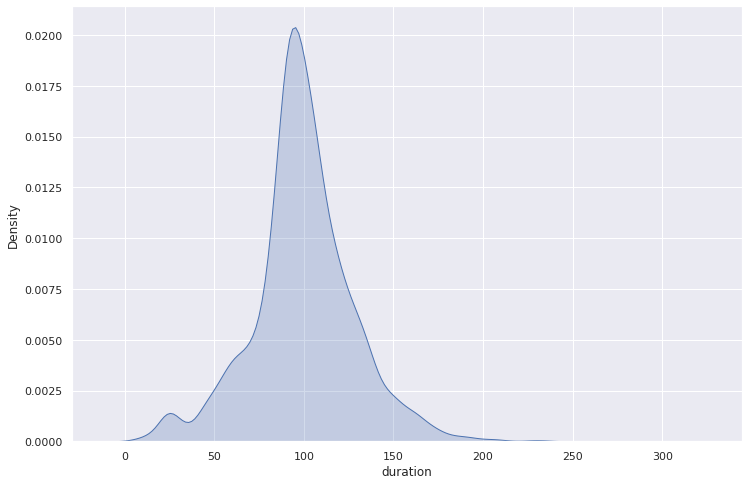

In [35]:
#Analysis on the duration of the movies 
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
sns.kdeplot(data=netflix_movies['duration'], shade=True)

**Inferences :**
- Most no of movies on the Netflix platform are in the range of 70 minutes to 120 minutes of length.
- Very few movies are of length more than 200. 


##### **Chart - 2 : TV-Shows Duration :** 

In [36]:
netflix_shows['duration']=netflix_shows['duration'].str.replace(' Season','')
netflix_shows['duration']=netflix_shows['duration'].str.replace(' Seasons','')
netflix_shows['duration']=netflix_shows['duration'].str.replace('s','')
netflix_shows['duration']=netflix_shows['duration'].astype(str).astype(int)

<Axes: xlabel='duration', ylabel='Density'>

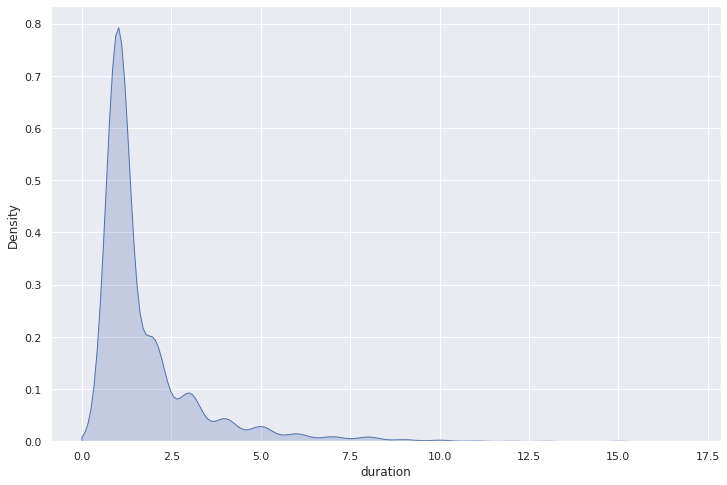

In [37]:
#Analysis on the duration of the movies 
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
sns.kdeplot(data=netflix_shows['duration'], shade=True)

**Inferences :**
- Most of the TV shows are of 2 seasons length and very few TV shows have more than 6 seasons.
- A very small amount of shows have more than 13 seasons as well! 


### **Listed in :**

In [38]:
#Genre to list
def convert_to_list(df):
  genre_count = {}
  genre_count_final = []
  genre_list = list(df['listed_in'])
  for each in range(len(genre_list)):
    genre_count_final.extend(genre_list[each].split(", "))
  for each in genre_count_final:
    if each not in genre_count:
      genre_count[each] = genre_count_final.count(each)
  return genre_count

In [39]:
#To list
genre_dict = convert_to_list(df)

#Make genre df
genre_df = pd.DataFrame.from_dict(genre_dict, orient='index', columns=['count']).sort_values('count', ascending=False)

##### **Chart - 1 : Genre wise distribution of content:** 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'International Movies'),
  Text(1, 0, 'Dramas'),
  Text(2, 0, 'Comedies'),
  Text(3, 0, 'International TV Shows'),
  Text(4, 0, 'Documentaries'),
  Text(5, 0, 'Action & Adventure'),
  Text(6, 0, 'TV Dramas'),
  Text(7, 0, 'Independent Movies'),
  Text(8, 0, 'Children & Family Movies'),
  Text(9, 0, 'Romantic Movies'),
  Text(10, 0, 'TV Comedies'),
  Text(11, 0, 'Thrillers'),
  Text(12, 0, 'Crime TV Shows'),
  Text(13, 0, "Kids' TV"),
  Text(14, 0, 'Docuseries'),
  Text(15, 0, 'Romantic TV Shows'),
  Text(16, 0, 'Stand-Up Comedy'),
  Text(17, 0, 'Music & Musicals'),
  Text(18, 0, 'Horror Movies'),
  Text(19, 0, 'British TV Shows'),
  Text(20, 0, 'Reality TV'),
  Text(21, 0, 'Sci-Fi & Fantasy'),
  Text(22, 0, 'Sports Movies'),
  Text(23, 0, 'Korean TV Shows'),
  Text(24, 0, 'TV Action

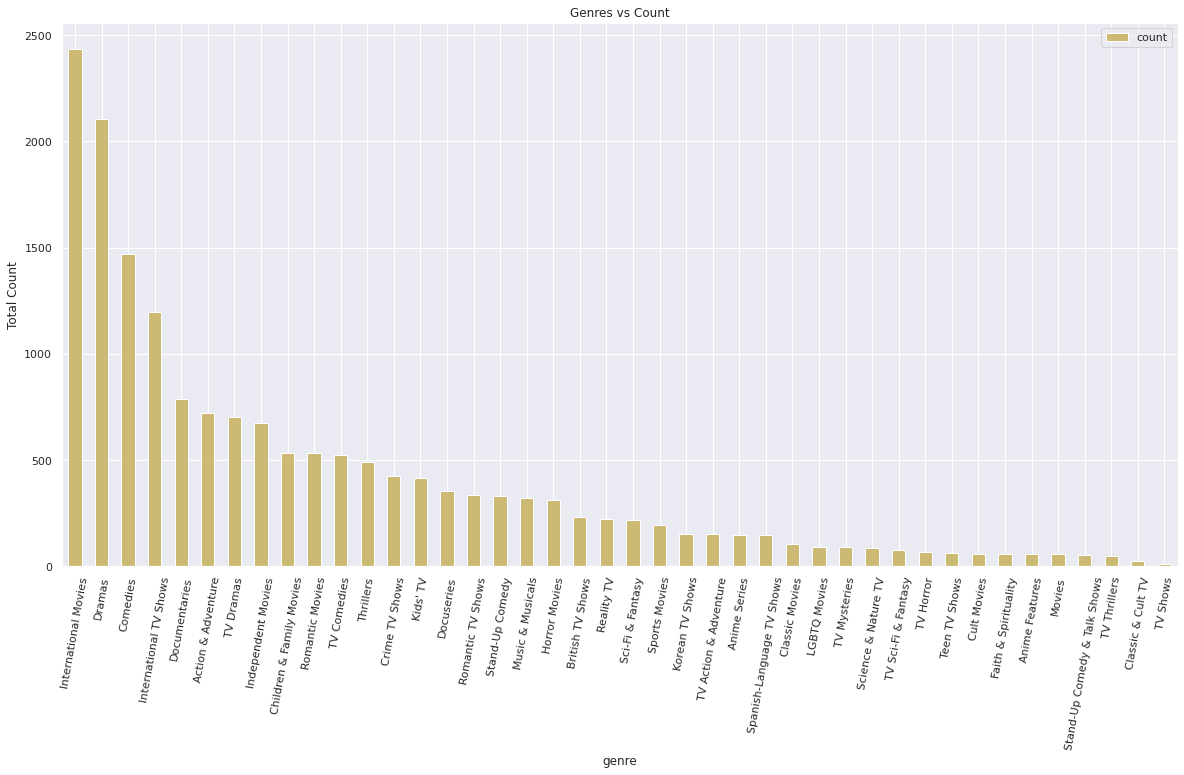

In [40]:
plt.rcParams["figure.figsize"] = (20, 10)
genre_df.plot(kind='bar', color='y')
plt.xlabel("genre")
plt.ylabel("Total Count")
plt.title("Genres vs Count")
plt.xticks(rotation=80)

**Inferences :**
- Close to 2400 projects are of the genre international movies which is the highest. Dramas is the 2nd highest genre with around 2100 projects.
- Comedies is still the popular genre with around 1500 projects on the Netflix platform.
- Surprisingly, Stand-up comedy and talk shows genre is one of the poorly represented on Netflix. One of the reason could be people are generally more keen to attend them live.


## ***5. Feature Engineering & Data Pre-processing***
*In order to create more accurate Machine learning models, feature engineering & data pre-processing is a vital step. It consists of four main steps: Feature Creation, Transformations, Feature Extraction, and Feature Selection. Effective feature engineering is based on sound knowledge of the business problem and the available data sources.*

### 1. Handling Missing Values

In [ ]:
Complete_columns_info(df)

 selected dataframe has 12 columns and 7787 rows


No of Null Values  % of null values  No of unique values  \
director                   2389              30.7                 4049   
cast                        718               9.2                 6831   
country                     507               6.5                  681   
date_added                   10               0.1                 1565   
rating                        7               0.1                   14   
show_id                       0               0.0                 7787   
type                          0               0.0                    2   
title                         0               0.0                 7787   
release_year                  0               0.0                   73   
duration                      0               0.0                  216   
listed_in                     0               0.0                  492   
description                   0               0.0                 7769   

             Data Type  
director        object  
cast            object  
country         object  
date_added      object  
rating          object  
show_id         object  
type            object  
title           object  
release_year     int64  
duration        object  
listed_in       object  
description     object

- The missing values in the director, cast, and country attributes can be replaced with an 'empty string'.
- Since the number of null values in rating and date_added is not much(0.1%), we will be dropping them.

In [ ]:
# Handling Missing Values & Missing Value Imputation
df[['director','cast','country']] = df[['director','cast','country']].fillna(' ')
df.dropna(axis=0, inplace=True)

In [ ]:
Complete_columns_info(df)

 selected dataframe has 12 columns and 7770 rows


No of Null Values  % of null values  No of unique values  \
show_id                       0               0.0                 7770   
type                          0               0.0                    2   
title                         0               0.0                 7770   
director                      0               0.0                 4048   
cast                          0               0.0                 6818   
country                       0               0.0                  682   
date_added                    0               0.0                 1563   
release_year                  0               0.0                   73   
rating                        0               0.0                   14   
duration                      0               0.0                  216   
listed_in                     0               0.0                  491   
description                   0               0.0                 7752   

             Data Type  
show_id         object  
type            object  
title           object  
director        object  
cast            object  
country         object  
date_added      object  
release_year     int64  
rating          object  
duration        object  
listed_in       object  
description     object

#### What all missing value imputation techniques have you used and why did you use those techniques?

- The missing values in the **director, cast, and country** attributes are replaced with an **'empty string'**.
- Since the number of null values in **rating and date_added **were not much(0.1%), we have **dropped** them.

## ***6. Textual Data Preprocessing***

*Text preprocessing is a method to clean the text data and make it ready to feed data to the model. Text data contains noise in various forms like emotions, punctuation, text in a different case. As machine doesn't understand these things, we have used following approach to process the data.*



**Approach**
1. Select the attributes based on which you want to cluster the shows.
2. Text preprocessing: Remove all stopwords and punctuation marks, convert all textual data to lowercase.
3. Stemming to generate a meaningful word out of corpus of words.
4. Tokenization of corpus and Word vectorization.
5. Dimensionality reduction.


In [ ]:
#creating a copy to avoid blunders

df1=df.copy()

#### **1. Selecting Attributes for Clustering**

We will be selecting Director, Cast, Country, Rating, Listed in (genres) and Description as the attributes for clustering.

In [ ]:
# creating attributes_for_clustering column using selected clustering attribues for model building purpose.

df1['attributes_for_clustering']= df1['director']+ ' ' + df1['cast'] + ' ' + df1['country'] + ' ' + df1['rating']+ ' ' + df1['listed_in']+ ' ' + df1['description']    

In [ ]:
df1['attributes_for_clustering'][0]

'  João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi Brazil TV-MA International TV Shows, TV Dramas, TV Sci-Fi & Fantasy In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

#### **2. Removing Stopwords & Lower Casing**

In [ ]:
# download the stop words list if it is not already downloaded
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stop words and lowercasing each word
df1['attributes_for_clustering'] = df1['attributes_for_clustering'].apply(stopwords)

In [ ]:
df1['attributes_for_clustering'][0]

'joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi brazil tv-ma international tv shows, tv dramas, tv sci-fi & fantasy future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.'

#### **3. Removing Punctuations**

In [ ]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    # replacing the punctuations with no space, which deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# Removing punctuation marks
df1['attributes_for_clustering'] = df1['attributes_for_clustering'].apply(remove_punctuation)

In [ ]:
df1['attributes_for_clustering'][0]

'joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil tvma international tv shows tv dramas tv scifi  fantasy future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

#### **4. Stemming**

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [ ]:
# Stemming
df1['attributes_for_clustering'] = df1['attributes_for_clustering'].apply(stemming)

In [ ]:
df1['attributes_for_clustering'][0]

'joão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil tvma intern tv show tv drama tv scifi fantasi futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

#### **5. Text Vectorization**

In [ ]:
# extract the tfidf representation matrix of the text data
tfidf_vectorizer= TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)  # max features = 10000 to prevent system from crashing
tfidf_matrix = tfidf_vectorizer.fit_transform(df1['attributes_for_clustering'])

# collect the tfidf matrix in numpy array
array = tfidf_matrix.toarray()  

In [ ]:
print(array)
print(f'shape of the vector : {array.shape}')
print(f'datatype : {type(array)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7770, 10000)
datatype : <class 'numpy.ndarray'>


##### Which text vectorization technique have you used and why?

We have used **TFIDF vectorization** technique because it takes into account not only **how many times** a word appears in a document but also **how important** that word is to the whole corpus. Hence it helps in making the model building **less complex** by reducing the input dimensions.

#### **6. Dimensionality Reduction**

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=0)
pca.fit(array)

PCA(random_state=0)

Text(0, 0.5, 'Cumulative Explained Variance')

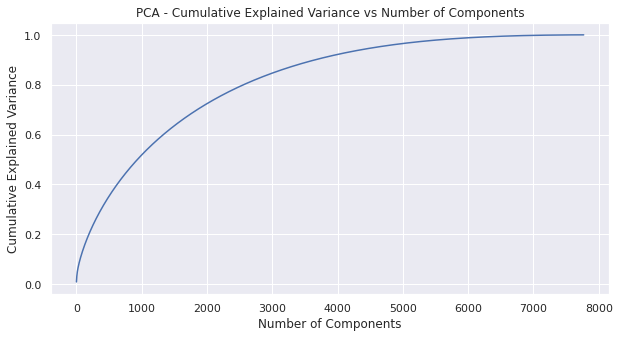

In [ ]:
# Explained variance for different number of components by plotting scree plot

plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative Explained Variance vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

From the above Scree Plot:
* **100%** of the variance is explained by about **~7600 components**.
* Also, more than **90%** of the variance is explained just by **5000 components**.
* Hence to simplify the model and to reduce dimensionality, we can take the **top 5000 components**, which will still be able to capture more than 90% of variance.

In [ ]:
# reducing the dimensions to 5000 using pca
pca = PCA(n_components=5000,random_state=0)
pca.fit(array)

PCA(n_components=5000, random_state=0)

In [ ]:
# transformed features
X = pca.transform(array)

# shape of transformed vectors
X.shape

(7770, 5000)

## ***7. ML Model Implementation***

*Unlike supervised machine learning which fits a model to a dataset with reference to a target label, unsupervised machine learning algorithms are allowed to determine patterns in the dataset without recourse to a target label. Here, we have used two most commonly used models - K-Means Clustering and Hierarchical Clustering algorithms.*

**Approach:**

1. Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques.
2. Build optimal number of clusters and visualize the contents of each cluster using wordclouds.

### **ML Model - 1 : K-Means Clustering** 

- *K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters.*
- *It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.*
- *It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.*

Visualizing the Elbow Plot and Silhouette score to decide the optimal number of clusters for K-means Clustering Algorithm.

Text(0, 0.5, 'Sum of Squared Errors')

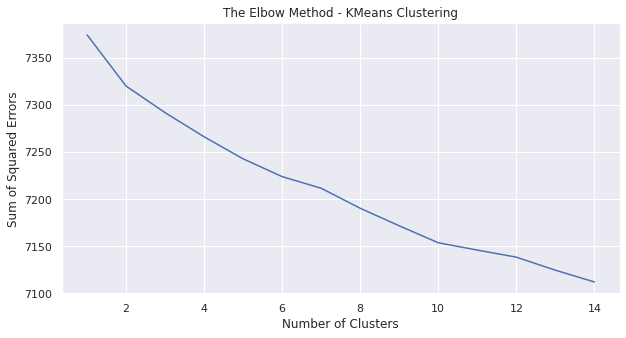

In [ ]:
# Elbow method to find the optimal value of k

SSE=[]
for i in range(1,15):
  # Initialize the k-means model with the current value of i
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the value of SSE
number_clusters = range(1,15)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,SSE)
plt.title('The Elbow Method - KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')

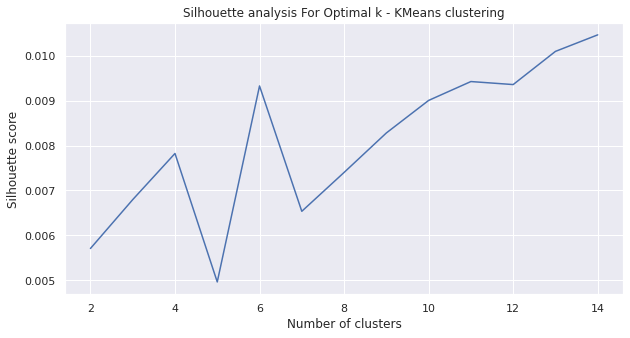

In [ ]:
#Silhouette score method to find the optimal value of k

# Initialize a list to store the silhouette score for each value of k
silhouette_scr = []

for k in range(2, 15):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_scr.append(score)
  
# Plot the Silhouette analysis
plt.figure(figsize=(10,5))
plt.plot(range(2,15), silhouette_scr)
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

From the above plot, the number of clusters is selected as 10. Let's build clusters using k=10.

In [ ]:
# Clustering the data into 10 clusters
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=0)
kmeans.fit(X)

KMeans(n_clusters=10, random_state=0)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

(7153.321974623428, 0.009003822058348395)


In [ ]:
# Adding a kmeans cluster number attribute
df1['kmeans_cluster'] = kmeans.labels_

In [ ]:
df1.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                           attributes_for_clustering  kmeans_cluster  \
0  joão miguel bianca comparato michel gome rodol...               5   
1  jorg michel grau demián bichir héctor bonilla ...               1   
2  gilbert chan tedd chan stella chung henley hii...               1   
3  shane acker elijah wood john c reilli jennif c...               6   
4  robert luket jim sturgess kevin spacey kate bo...               6   

   hierarchical_cluster  
0                     8  
1                     9  
2                     2  
3                     1  
4                     1

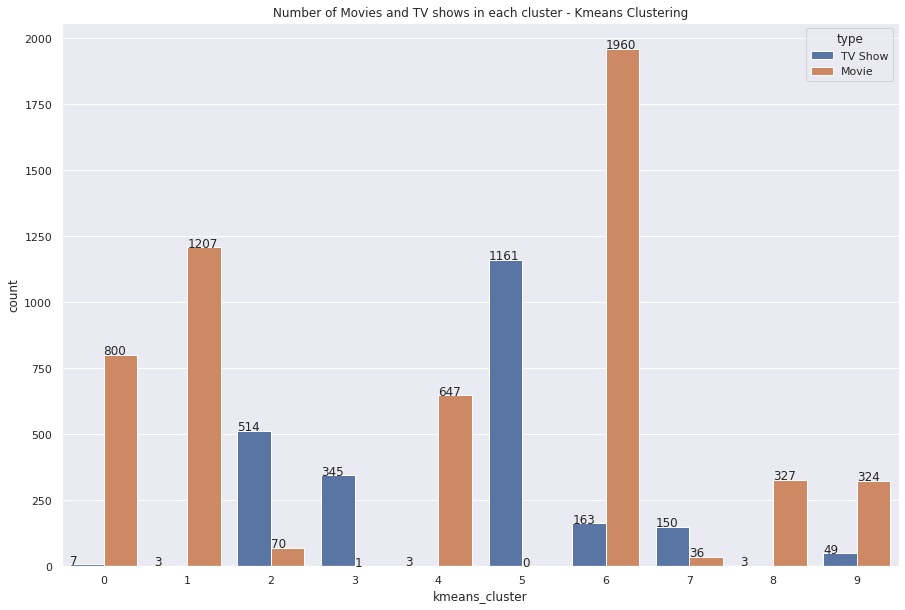

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(15,10))
graph = sns.countplot(x='kmeans_cluster',data=df1, hue='type')
plt.title('Number of Movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

### **Building wordclouds for different clusters built:**

*A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. Word clouds can be particularly helpful when we want to:*

- *Quickly identify the most important themes or topics in a large body of text.*
- *Understand the overall sentiment or tone of a piece of writing.*
- *Explore patterns or trends in data that contain textual information.*
- *Communicate the key ideas or concepts in a visually engaging way.*


In [ ]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df1[df1['kmeans_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

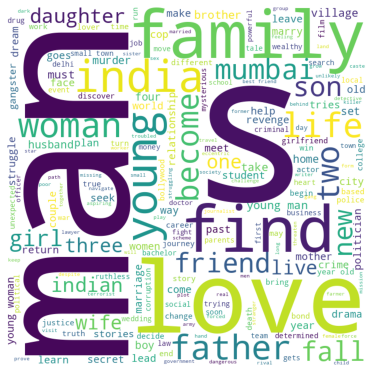

In [ ]:
# Wordcloud for cluster 0
kmeans_worldcloud(0)

**Keywords observed in cluster 0: man, find, love, family, young, friend etc**

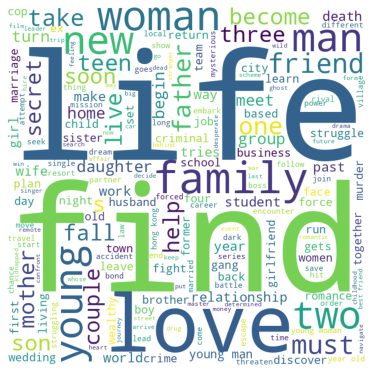

In [ ]:
# Wordcloud for cluster 1
kmeans_worldcloud(1)

**Keywords observed in cluster 1: life, love, family, woman, find, two, young, three etc**

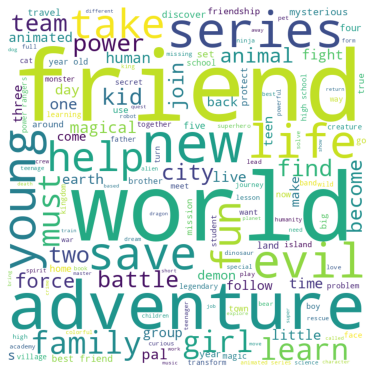

In [ ]:
# Wordcloud for cluster 2
kmeans_worldcloud(2)

**Keywords observed in cluster 2: friend, adventure, world, save, series, young, girl, learn etc**

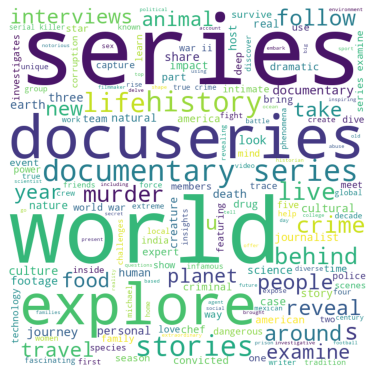

In [ ]:
# Wordcloud for cluster 3
kmeans_worldcloud(3)

**Keywords observed in cluster 3: series, docuseries, world, explore, murder, history etc**

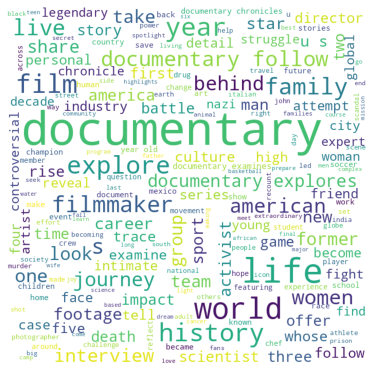

In [ ]:
# Wordcloud for cluster 4
kmeans_worldcloud(4)

**Keywords observed in cluster 4: documentary, family, life, anerican, explore, filmmaker, world, live etc**

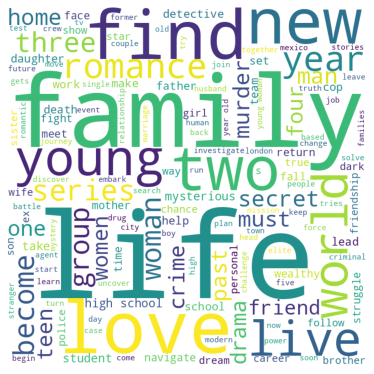

In [ ]:
# Wordcloud for cluster 5
kmeans_worldcloud(5)

**Keywords observed in cluster 5: find, new, life, family, love, woman, two, group, young, drama etc**

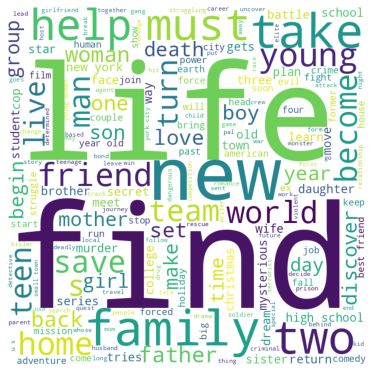

In [ ]:
# Wordcloud for cluster 6
kmeans_worldcloud(6)

**Keywords observed in cluster 6: find, life, family, two, new, world, team, friend etc**

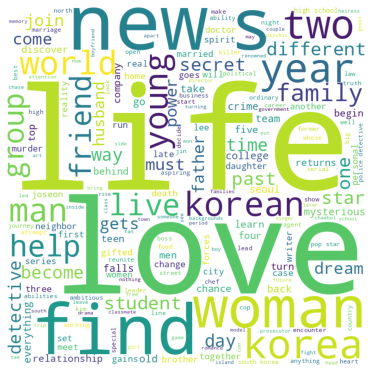

In [ ]:
# Wordcloud for cluster 7
kmeans_worldcloud(7)

**Keywords observed in cluster 7: life, love, new, year, korean, find, different, family, man etc**

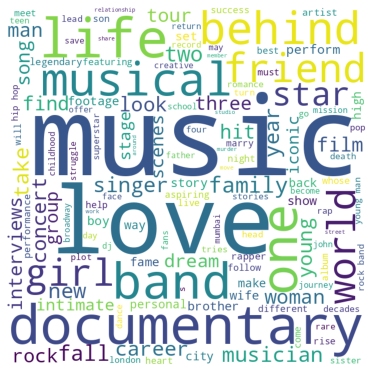

In [ ]:
# Wordcloud for cluster 8
kmeans_worldcloud(8)

**Keywords observed in cluster 8: music, love, band, girl, documentary, world, musical, star etc**

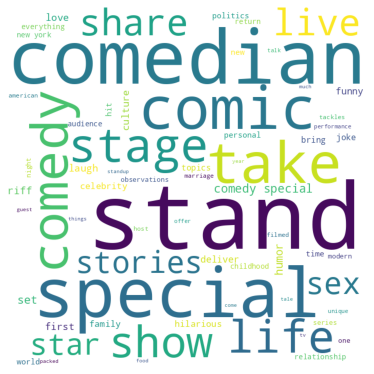

In [ ]:
# Wordcloud for cluster 9
kmeans_worldcloud(9)

**Keywords observed in cluster 9: comedian, comic, stand, stage, special, stories, take etc**

### **ML Model - Hierarchical Clustering:**

*Hierarchical clustering is an unsupervised machine-learning clustering strategy. Unlike K-means clustering, tree-like morphologies are used to bunch the dataset, and dendrograms are used to create the hierarchy of the clusters. They have two approaches:*

- ***Agglomerative*** *: Agglomerative is a bottom-up approach, in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left.*
- ***Divisive*** *: Divisive algorithm is the reverse of the agglomerative algorithm as it is a top-down approach.*

Visualizing the dendrogram to decide on the optimal number of clusters for the agglomerative (hierarchical) clustering algorithm:

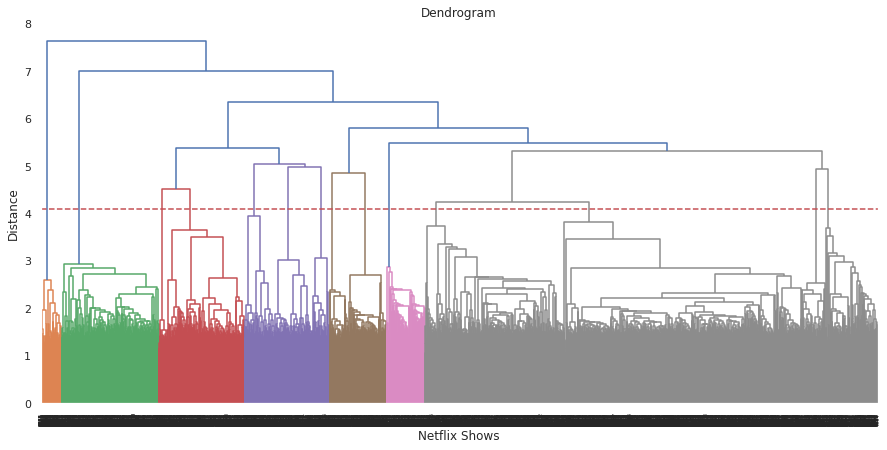

In [ ]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(15,7))  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 4.1, color='r', linestyle='--')

Since the threshold cuts the dendrogram at 14 places, total 14 number of clusters can be built. Let's use Hierarchical Clustering Algorithm.

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(X)

array([ 8,  9,  2, ..., 11,  8, 11])

In [ ]:
# Adding a hierarchical cluster number attribute
df1['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
df1.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                           attributes_for_clustering  kmeans_cluster  \
0  joão miguel bianca comparato michel gome rodol...               5   
1  jorg michel grau demián bichir héctor bonilla ...               1   
2  gilbert chan tedd chan stella chung henley hii...               1   
3  shane acker elijah wood john c reilli jennif c...               6   
4  robert luket jim sturgess kevin spacey kate bo...               6   

   hierarchical_cluster  
0                     8  
1                     9  
2                     2  
3                     1  
4                     1

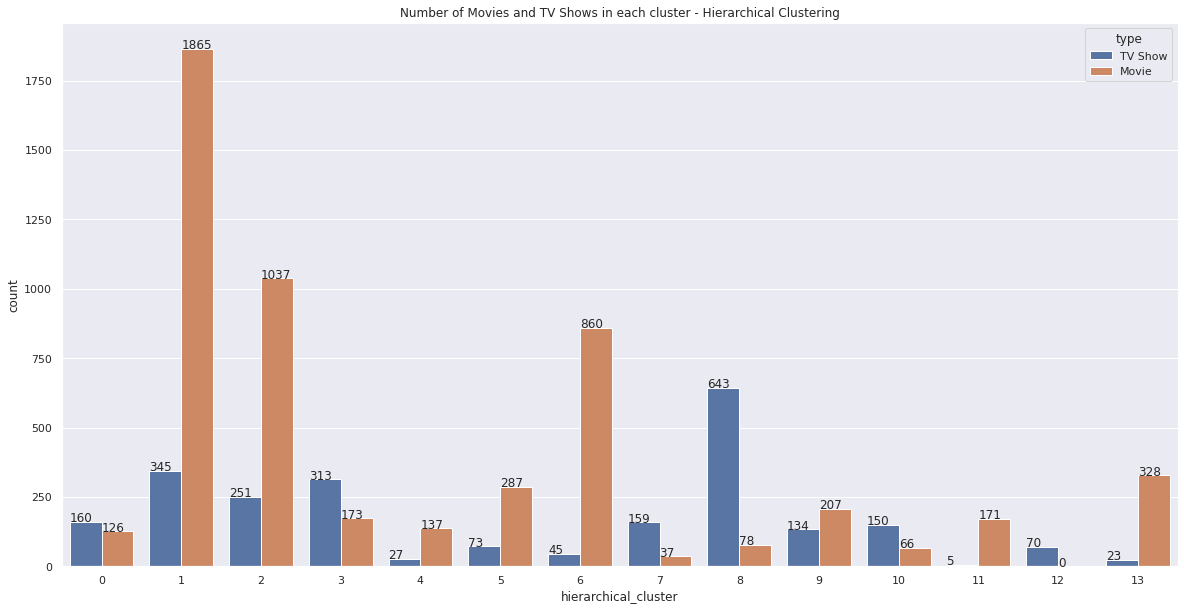

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(20,10))
graph = sns.countplot(x='hierarchical_cluster',data=df1, hue='type')
plt.title('Number of Movies and TV Shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

### **Building wordclouds for different clusters built:**

*A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. Word clouds can be particularly helpful when we want to:*

- *Quickly identify the most important themes or topics in a large body of text.*
- *Understand the overall sentiment or tone of a piece of writing.*
- *Explore patterns or trends in data that contain textual information.*
- *Communicate the key ideas or concepts in a visually engaging way.*

In [ ]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df1[df1['hierarchical_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

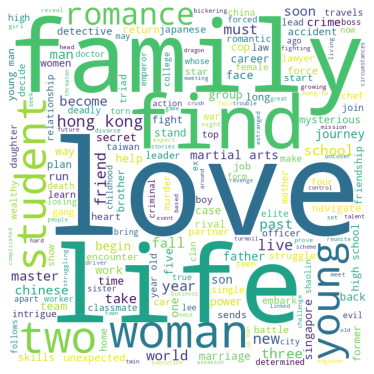

In [ ]:
# Wordcloud for cluster 0
hierarchical_worldcloud(0)

**Keywords observed in cluster 0: find, life, family, romance, two, friend love etc**

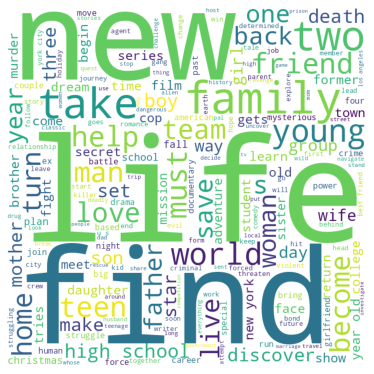

In [ ]:
# Wordcloud for cluster 1
hierarchical_worldcloud(1)

**Keywords observed in cluster 1: new, life, find, world, take, death, father etc**

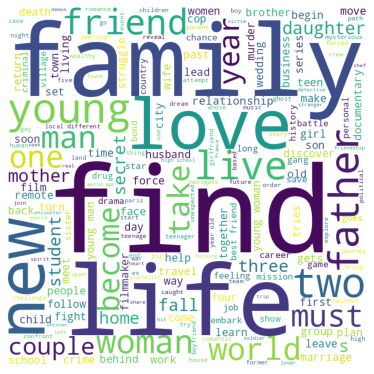

In [ ]:
# Wordcloud for cluster 2
hierarchical_worldcloud(2)

**Keywords observed in cluster 2: family, love, find, life, new, live etc**

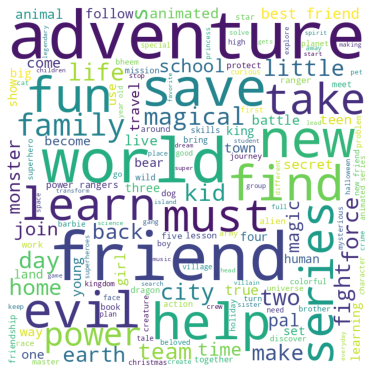

In [ ]:
# Wordcloud for cluster 3
hierarchical_worldcloud(3)

**Keywords observed in cluster 3: adventure, friend, learn, evil, find, new, save etc**

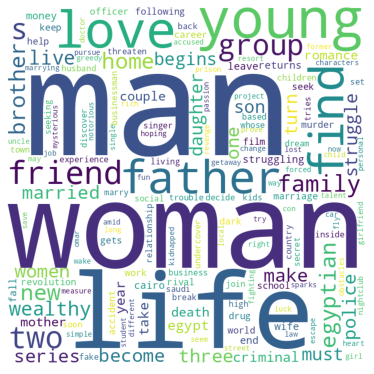

In [ ]:
# Wordcloud for cluster 4
hierarchical_worldcloud(4)

**Keywords observed in cluster 4: man, woman, life, father family, friend, young etc**

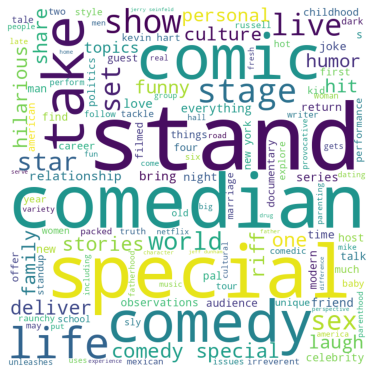

In [ ]:
# Wordcloud for cluster 5
hierarchical_worldcloud(5)

**Keywords observed in cluster 5: stand, comedian, special, comedy, comic, take, stage, star etc**

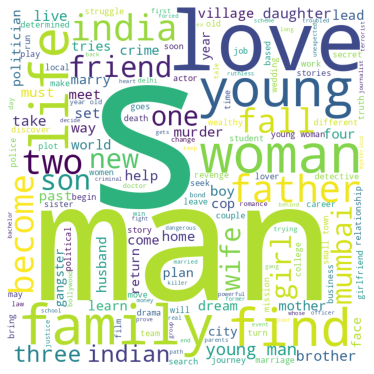

In [ ]:
# Wordcloud for cluster 6
hierarchical_worldcloud(6)

**Keywords observed in cluster 6: young, love, woman, indian, two, son, fall, father etc**

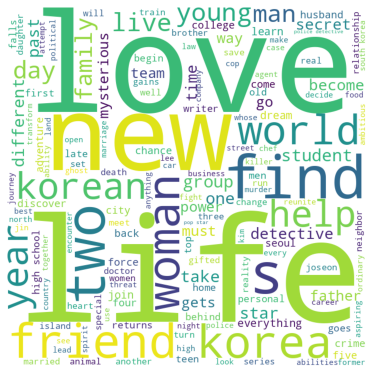

In [ ]:
# Wordcloud for cluster 7
hierarchical_worldcloud(7)

**Keywords observed in cluster 7: love, new, life, woman, help, korean, two, korea, detective, soul etc**

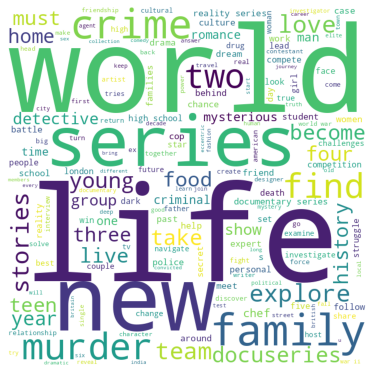

In [ ]:
# Wordcloud for cluster 8
hierarchical_worldcloud(8)

**Keywords observed in cluster 8: world, series, life, new, family, murder, crime, explore etc**

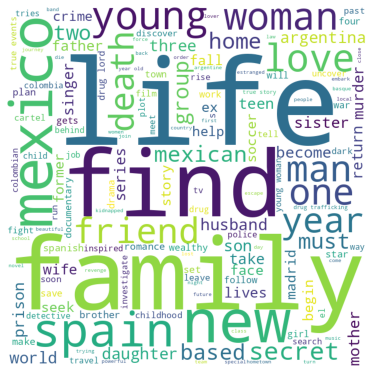

In [ ]:
# Wordcloud for cluster 9
hierarchical_worldcloud(9)

**Keywords observed in cluster 9 : family, find, mexico, new, spain, death, young, woman etc**

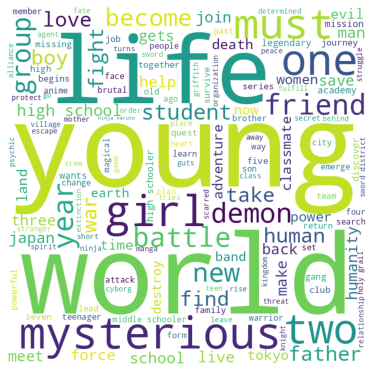

In [ ]:
# Wordcloud for cluster 10
hierarchical_worldcloud(10)

**Keywords observed in cluster 10: young, life, world, girl, demon, mysterious, must, battle etc**

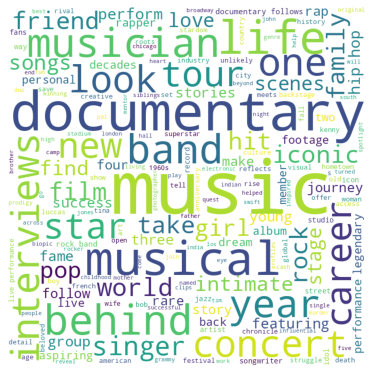

In [ ]:
# Wordcloud for cluster 11
hierarchical_worldcloud(11)

**Keywords observed in cluster 11: documentary, music, band, behind, concert, musical, iconic, career etc**

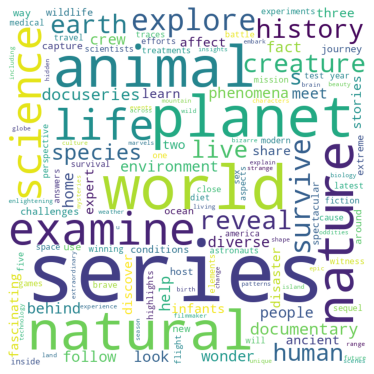

In [ ]:
# Wordcloud for cluster 12
hierarchical_worldcloud(12)

**Keywords observed in cluster 12 : series, natural, examine, planet, nature, life, species etc**

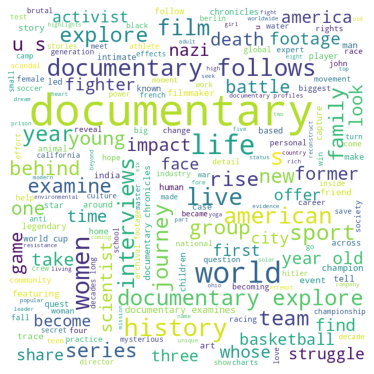

In [ ]:
# Wordcloud for cluster 13
hierarchical_worldcloud(13)

**Keywords observed in cluster 13: explore, documentary, life, history, family, look, america etc**

## ***8. Content Based Recommender System:***



*Recommender systems are a type of machine learning algorithm that provides consumers with "relevant" recommendations. When we search for something anywhere, be it in an app or in our search engine, this recommender system is used to provide us with relevant results. It identifies the similarity between the products based on their descriptions and recommends products or items to the customers.*

In [ ]:
# verifying index
df1[['show_id', 'title', 'attributes_for_clustering']]

show_id                                    title  \
0         s1                                       3%   
1         s2                                     7:19   
2         s3                                    23:59   
3         s4                                        9   
4         s5                                       21   
...      ...                                      ...   
7782   s7783                                     Zozo   
7783   s7784                                   Zubaan   
7784   s7785                        Zulu Man in Japan   
7785   s7786                    Zumbo's Just Desserts   
7786   s7787  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                              attributes_for_clustering  
0     joão miguel bianca comparato michel gome rodol...  
1     jorg michel grau demián bichir héctor bonilla ...  
2     gilbert chan tedd chan stella chung henley hii...  
3     shane acker elijah wood john c reilli jennif c...  
4     robert luket jim sturgess kevin spacey kate bo...  
...                                                 ...  
7782  josef fare imad creidi antoinett turk elia ger...  
7783  mozez singh vicki kaushal sarahjan dia raaghav...  
7784  nasti c tvma documentari intern movi music mus...  
7785  adriano zumbo rachel khoo australia tvpg inter...  
7786  sam dunn unit kingdom canada unit state tvma d...  

[7770 rows x 3 columns]

- In the above dataframe, total no of rows are only 7770. However, the last index is 7786. We had dropped a few rows while treating the null values and hence the difference is shown here.

* So, in order to build a recommender system, we will be considering a new df of the original given dataset.



In [ ]:
# defining a new df for building a recommender system
recommender_df = df1.copy()

In [ ]:
# reseting index
recommender_df.reset_index(inplace=True)

# checking reset index 
recommender_df[['show_id', 'title', 'attributes_for_clustering']]

show_id                                    title  \
0         s1                                       3%   
1         s2                                     7:19   
2         s3                                    23:59   
3         s4                                        9   
4         s5                                       21   
...      ...                                      ...   
7765   s7783                                     Zozo   
7766   s7784                                   Zubaan   
7767   s7785                        Zulu Man in Japan   
7768   s7786                    Zumbo's Just Desserts   
7769   s7787  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                              attributes_for_clustering  
0     joão miguel bianca comparato michel gome rodol...  
1     jorg michel grau demián bichir héctor bonilla ...  
2     gilbert chan tedd chan stella chung henley hii...  
3     shane acker elijah wood john c reilli jennif c...  
4     robert luket jim sturgess kevin spacey kate bo...  
...                                                 ...  
7765  josef fare imad creidi antoinett turk elia ger...  
7766  mozez singh vicki kaushal sarahjan dia raaghav...  
7767  nasti c tvma documentari intern movi music mus...  
7768  adriano zumbo rachel khoo australia tvpg inter...  
7769  sam dunn unit kingdom canada unit state tvma d...  

[7770 rows x 3 columns]

Since the last index and total no of rows are same, now our dataset is ready to build content based recommandation system.

In [ ]:
# dropping show-id and index column
recommender_df.drop(columns=['index', 'show_id'], inplace=True)

In [ ]:
# calling out transformed array after performing PCA for dimenssionality reduction.
X

array([[ 1.40386830e-01, -1.40260467e-02, -9.95622435e-03, ...,
         1.08447899e-03, -3.82045731e-03, -1.20740652e-04],
       [-3.46286602e-02, -3.98994408e-02, -5.77338160e-03, ...,
        -9.17416622e-03, -1.39965365e-03,  9.04070900e-04],
       [-3.76045733e-02, -4.33544034e-02, -3.95739894e-02, ...,
         5.45098366e-03,  4.75812842e-03, -2.55817854e-03],
       ...,
       [-9.00910134e-02,  3.66956773e-02,  2.85573986e-01, ...,
        -3.58155738e-03,  3.96042829e-03,  2.85148215e-03],
       [ 1.03386248e-01,  1.00522699e-02,  2.82900938e-02, ...,
        -4.74598164e-03, -4.22674722e-03, -8.27146253e-03],
       [-1.19417919e-01,  2.06754213e-01,  3.58863447e-01, ...,
        -2.12381809e-03,  2.37393048e-03, -7.75754241e-04]])

In [ ]:
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[ 1.        ,  0.0705771 ,  0.01510987, ..., -0.01240592,
         0.01445073, -0.02388627],
       [ 0.0705771 ,  1.        , -0.00137742, ...,  0.05123992,
        -0.00514273, -0.01673768],
       [ 0.01510987, -0.00137742,  1.        , ..., -0.00583459,
        -0.00761756, -0.02337747],
       ...,
       [-0.01240592,  0.05123992, -0.00583459, ...,  1.        ,
        -0.01169235,  0.2210375 ],
       [ 0.01445073, -0.00514273, -0.00761756, ..., -0.01169235,
         1.        ,  0.01212941],
       [-0.02388627, -0.01673768, -0.02337747, ...,  0.2210375 ,
         0.01212941,  1.        ]])

#### **Let's define a function which lists down top 10 recommended movies on the basis of cosine similarity score.**

In [ ]:
def recommend(movie):
  try:
    '''
    This function lists down top ten movies on the basis of similarity score for that particular movie.
    '''
    # Empty list
    recommend_content = []   
    # find out index position
    index = recommender_df[recommender_df['title'] == movie].index[0]
    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])
    # printing Statement
    print(f"If you liked '{movie}', you may also enjoy: \n")
    # listing top ten recommenaded movie
    for i in distances[1:11]:
      recommend_content.append(df1.iloc[i[0]].title)
    return recommend_content
  except:
     return 'Invalid Entry'

In [ ]:
recommend('Vikings Unearthed')

If you liked 'Vikings Unearthed', you may also enjoy: 



['Secrets of the Saqqara Tomb',
 'The Heat: A Kitchen (R)evolution',
 'NOVA: Chinese Chariot Revealed',
 'Lunatics',
 'Out of Many, One',
 "NOVA: Building Chernobyl's MegaTomb",
 'NOVA: Holocaust Escape Tunnel',
 'The Tudors',
 'E-Cigarettes: Miracle or Menace?',
 'Seth Meyers: Lobby Baby']

In [ ]:
recommend('Yanda Kartavya Aahe')

If you liked 'Yanda Kartavya Aahe', you may also enjoy: 



['Irada Pakka',
 'Kaakan',
 'Ee Nagaraniki Emaindi',
 'Bhouri',
 'Fire in the Blood',
 'Sex Education',
 'Tahaan',
 'Honeymoon Travels Pvt. Ltd.',
 'Upstarts',
 'Matichya Chuli']

In [ ]:
recommend('Invictus')

If you liked 'Invictus', you may also enjoy: 



['XV: Beyond the Tryline',
 'Gran Torino',
 'Space Cowboys',
 'The Story of God with Morgan Freeman',
 'Uncorked',
 'Antoine Griezmann: The Making of a Legend',
 'Rebecca',
 'Angel Has Fallen',
 'Unchained: The Untold Story of Freestyle Motocross',
 'Beyond All Boundaries']

In [ ]:
recommend('Naam Shabana')

If you liked 'Naam Shabana', you may also enjoy: 



['Judwaa 2',
 'Mahabharat',
 'The Shaukeens',
 'Mrs. Serial Killer',
 'Special 26',
 'Aiyaary',
 'Neevevaro',
 'Khoon Khoon',
 'Pukar',
 'Bewafaa']

In [ ]:
recommend('Avenger')

'Invalid Entry'

In [ ]:
df1.sample(10)

show_id     type                          title           director  \
7697   s7698    Movie            Yanda Kartavya Aahe       Kedar Shinde   
7360   s7361  TV Show                       Unsolved                      
3729   s3730    Movie                    Lost Bullet  Guillaume Pierret   
6319   s6320    Movie           The Dukes of Hazzard  Jay Chandrasekhar   
4425   s4426    Movie  Natsamrat - Asa Nat Hone Nahi   Mahesh Manjrekar   
1500   s1501    Movie                   Cop Watchers         Ben Steele   
3042   s3043    Movie                       Invictus     Clint Eastwood   
1172   s1173    Movie                        Calibre        Matt Palmer   
7386   s7387  TV Show                          Valor                      
30       s31    Movie               #cats_the_mewvie   Michael Margolis   

                                                   cast         country  \
7697  Ankush Choudhary, Smita Shewale, Mohan Joshi, ...           India   
7360       Josh Duhamel, Jimmi Simpson, Bokeem Woodbine   United States   
3729  Alban Lenoir, Nicolas Duvauchelle, Ramzy Bedia...          France   
6319  Johnny Knoxville, Seann William Scott, Jessica...   United States   
4425  Nana Patekar, Medha Manjrekar, Mrinmayee Deshp...           India   
1500                                                                      
3042  Morgan Freeman, Matt Damon, Tony Kgoroge, Patr...   United States   
1172  Jack Lowden, Martin McCann, Tony Curran, Ian P...  United Kingdom   
7386  Christina Ochoa, Matt Barr, Corbin Reid, Charl...   United States   
30                                                               Canada   

             date_added  release_year rating  duration  \
7697    January 1, 2018          2006  TV-PG   151 min   
7360  February 27, 2019          2018  TV-MA  1 Season   
3729      June 19, 2020          2020  TV-MA    93 min   
6319    January 1, 2020          2005  PG-13   104 min   
4425       June 1, 2018          2016  TV-14   165 min   
1500     August 1, 2017          2016  TV-MA    45 min   
3042   November 1, 2019          2009  PG-13   134 min   
1172      June 29, 2018          2018  TV-MA   101 min   
7386   February 6, 2018          2018  TV-14  1 Season   
30     February 5, 2020          2020  TV-14    90 min   

                                             listed_in  \
7697            Comedies, Dramas, International Movies   
7360                         Crime TV Shows, TV Dramas   
3729  Action & Adventure, Dramas, International Movies   
6319                      Action & Adventure, Comedies   
4425                      Dramas, International Movies   
1500               Documentaries, International Movies   
3042                             Dramas, Sports Movies   
1172           Dramas, International Movies, Thrillers   
7386                  TV Action & Adventure, TV Dramas   
30                 Documentaries, International Movies   

                                            description  \
7697  Thanks to an arranged marriage that was design...   
7360  Ride along for a dramatized version of the rea...   
3729  Facing a murder charge, a genius mechanic with...   
6319  The Duke boys are back in this comedy based on...   
4425  A veteran Shakespearean actor steps off the st...   
1500  Explore the stories of the citizens who seek t...   
3042  After the end of apartheid, newly elected Pres...   
1172  Two lifelong friends on a hunting trip in Scot...   
7386  Following an unsuccessful mission in Somalia, ...   
30    This pawesome documentary explores how our fel...   

                              attributes_for_clustering  kmeans_cluster  \
7697  kedar shind ankush choudhari smita shewal moha...               0   
7360  josh duhamel jimmi simpson bokeem woodbin unit...               5   
3729  guillaum pierret alban lenoir nicola duvauchel...               1   
6319  jay chandrasekhar johnni knoxvill seann willia...               6   
4425  mahesh manjrekar nana patekar medha manjreka

## ***8.*** ***Future Work (Optional)***

* Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings. A detailed EDA and clustering can be done with more diverse date.
* More time could be given into building a better recommender system, which later can be deployed on web for usage.

## ***Conclusion:***

**Exploratory Data Analysis (EDA)** is an important step because it allows for the **initial investigation** of a dataset. It helps **to identify patterns, anomalies, and relationships** in the data, as well as to detect any potential issues such as **missing values or outliers**. Additionally, it is a good way **to understand the data**, which is crucial for good decision making. EDA also helps to provide a deeper understanding of the data and helps **to guide the direction** of further analysis.


**Predictions** of any ML model highly **impacts the business growth**. Before going for the model deployment, one should check how accurately the model is predicting and performing with the real life data. *Conclusions drawn from any model are very helpful to identify whether the model is good to go for deployment process or needs further refinement*.




**Project conclusions**:

> ***There are about 70% movies and 30% TV shows on Netflix. It was observed that Netflix is hosting/producing more no of TV shows than Movies as no of TV shows nearly trippled from 2010 to 2018.***


* ***Post 2018, production of movies are on a sharp decline. One of the plausible reason could be increase in watching of TV shows.***.
* ***Post 2020, production of TV Shows are on a sharp decline. One of the prominent reason could be outbreak of COVID-19.***.





> ***Marcus Raboy has directed the most number of movies(15) available on Netflix. He is followed by Jay Karas(14) and Cathy Garcia-Molina(13).***

> ***In the TV shows category, Rob Seidenglanz, Ken Burns and a few others has directed most no of shows(2). They are followed by Pantham Thongsang, Cheewatan Pusitsuksa and others with one show each.***.

> ***Anupam Kher (40 movies) and Takahiro Sakurai (20+ TV Shows) are the top actors.***



> ***The United State of America tops the content production with 3200 projects followed by India(990). The 2010 to 2020 decade has seen almost 5 times growth in the production and no of projects.***

> ***In the January month, Netflix adds most no of movies on their platform i.e 560. It is followed by December(554) and October(553).***

> ***Highest no of Movies and TV Shows are added on the 1st of any month. 15th day of any month sees the second highest no of additions.***

> ***Out of all the available content, almost 36.8% belongs to TV-MA rating which is for mature audiences only. Clearly, Netflix is serving majorly to the adult population.***

> ***Most no of movies on the Netflix platform are in the range of 70 minutes to 120 minutes of length. Most of the TV shows are of 2 seasons length and very few TV shows have more than 6 seasons.***

> ***International movies, dramas and comedies are the most popular genres on the platform.***

> ***We first built clusters using the K-Means Clustering algorithm, and the optimal number of clusters came out to be 10. This was obtained using Elbow method and Silhouette score analysis.***

> ***Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 14. This was obtained after visualizing the dendrogram.***

> ***A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.***


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***